In [1]:
# Install SHAP and LIME for model interpretation
!pip install shap lime
!pip install dask

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the file path
file_path = "./hair_loss.csv" 

df = pd.read_csv(file_path)

# Check the first few rows
df.head()

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
0,312,100,14,249,87,55,333,44,41,368,4
1,52,207,3,425,387,1,182,26,65,41,1
2,170,197,11,140,199,91,414,30,54,90,4
3,256,334,19,358,120,3,35,48,45,65,2
4,309,185,58,207,329,301,345,23,90,346,4


In [3]:
df.info

<bound method DataFrame.info of        total_protein  total_keratine  hair_texture  vitamin  manganese  iron  \
0                312             100            14      249         87    55   
1                 52             207             3      425        387     1   
2                170             197            11      140        199    91   
3                256             334            19      358        120     3   
4                309             185            58      207        329   301   
...              ...             ...           ...      ...        ...   ...   
99995            440              20            63      209        473   260   
99996            311             233            37      352        194   159   
99997             27             210            10      185        376   278   
99998            450              18            35      250        287   157   
99999            464             487            15      440        110   164   

       

In [4]:
df.describe

<bound method NDFrame.describe of        total_protein  total_keratine  hair_texture  vitamin  manganese  iron  \
0                312             100            14      249         87    55   
1                 52             207             3      425        387     1   
2                170             197            11      140        199    91   
3                256             334            19      358        120     3   
4                309             185            58      207        329   301   
...              ...             ...           ...      ...        ...   ...   
99995            440              20            63      209        473   260   
99996            311             233            37      352        194   159   
99997             27             210            10      185        376   278   
99998            450              18            35      250        287   157   
99999            464             487            15      440        110   164   

     

In [5]:
df.columns

Index(['total_protein', 'total_keratine', 'hair_texture', 'vitamin',
       'manganese', 'iron', 'calcium', 'body_water_content', 'stress_level',
       'liver_data', 'hair_fall'],
      dtype='object')

In [6]:
# Check number of unique values in each column
unique_values = df.nunique()
print(unique_values)

total_protein         500
total_keratine        500
hair_texture          100
vitamin               500
manganese             500
iron                  500
calcium               500
body_water_content    100
stress_level          100
liver_data            500
hair_fall               6
dtype: int64


### Check for Missing Values

In [7]:
print(df.isnull().sum())

total_protein         0
total_keratine        0
hair_texture          0
vitamin               0
manganese             0
iron                  0
calcium               0
body_water_content    0
stress_level          0
liver_data            0
hair_fall             0
dtype: int64


### Check for duplicate rows

In [8]:
duplicate_rows = df.duplicated()

print("Number of duplicate rows:", duplicate_rows.sum())

print(df[duplicate_rows])

Number of duplicate rows: 0
Empty DataFrame
Columns: [total_protein, total_keratine, hair_texture, vitamin, manganese, iron, calcium, body_water_content, stress_level, liver_data, hair_fall]
Index: []


### Check for outliers

In [9]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers for each column
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Display the number of outliers in each column
print("Number of outliers in each column:")
print(outliers.sum())

Number of outliers in each column:
total_protein         0
total_keratine        0
hair_texture          0
vitamin               0
manganese             0
iron                  0
calcium               0
body_water_content    0
stress_level          0
liver_data            0
hair_fall             0
dtype: int64


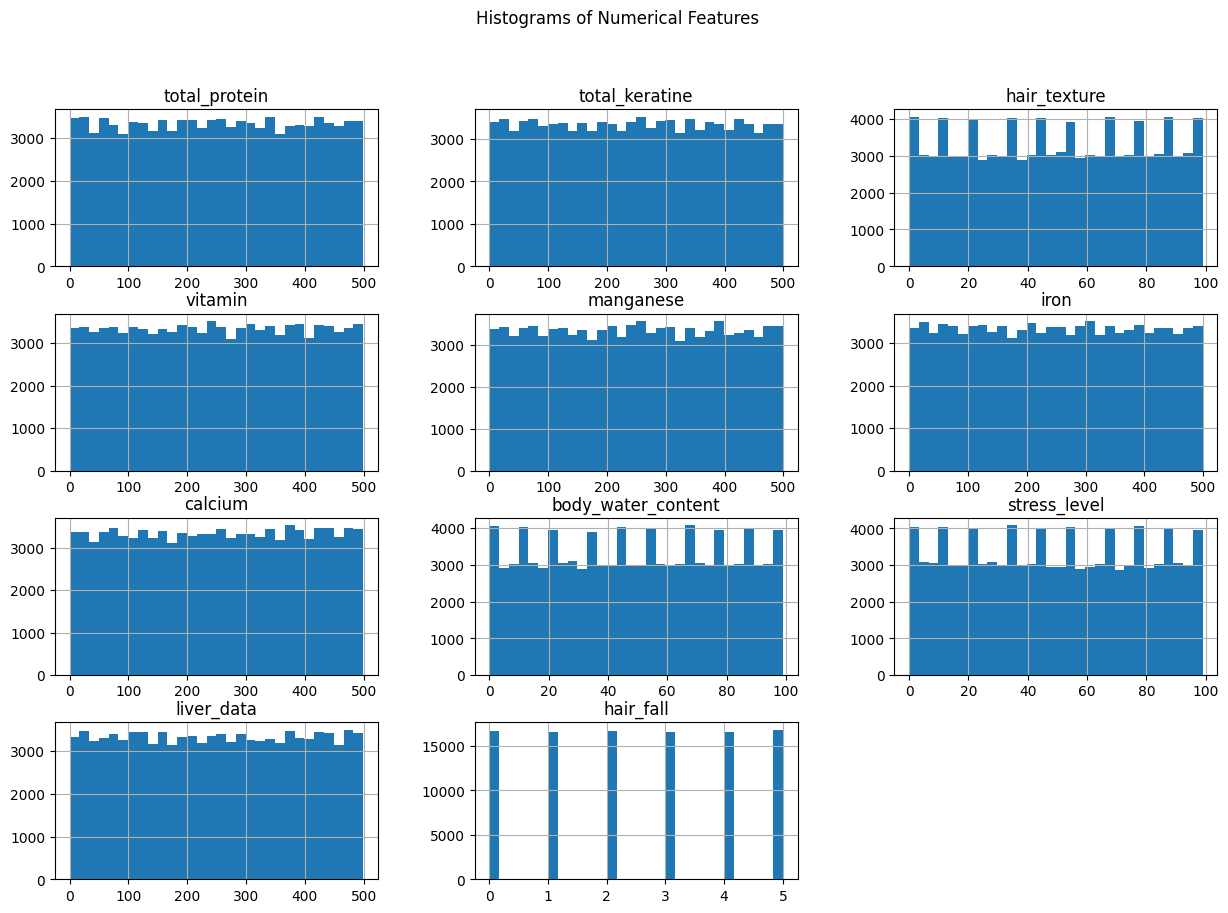

In [10]:
import matplotlib.pyplot as plt

# Plot histograms for each numerical column
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

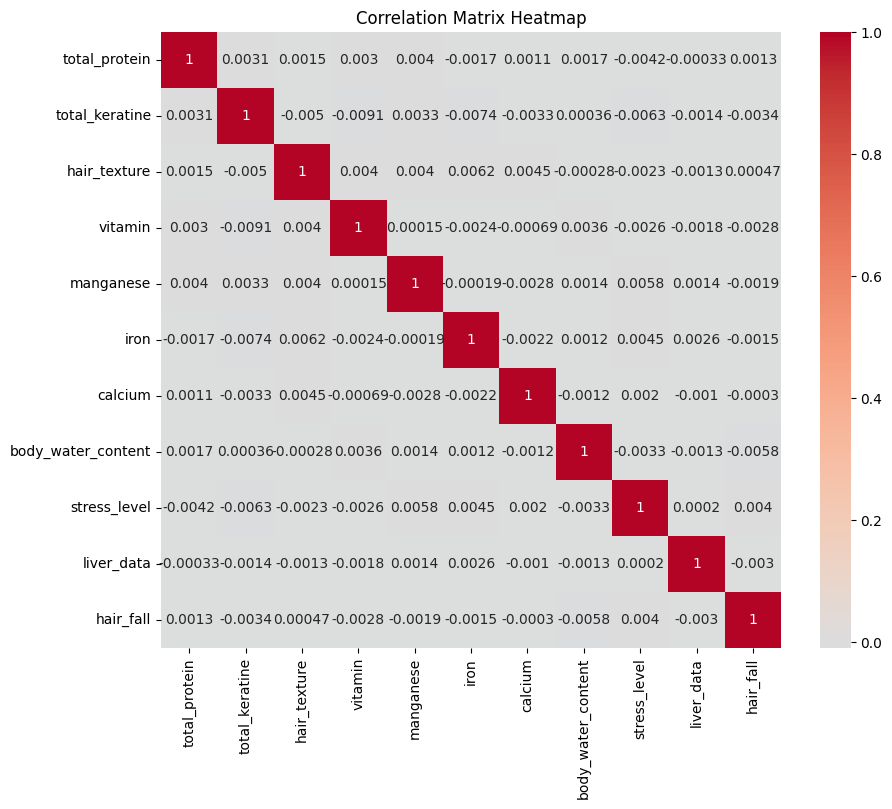

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Add titles and labels
plt.title('Correlation Matrix Heatmap')
plt.show()


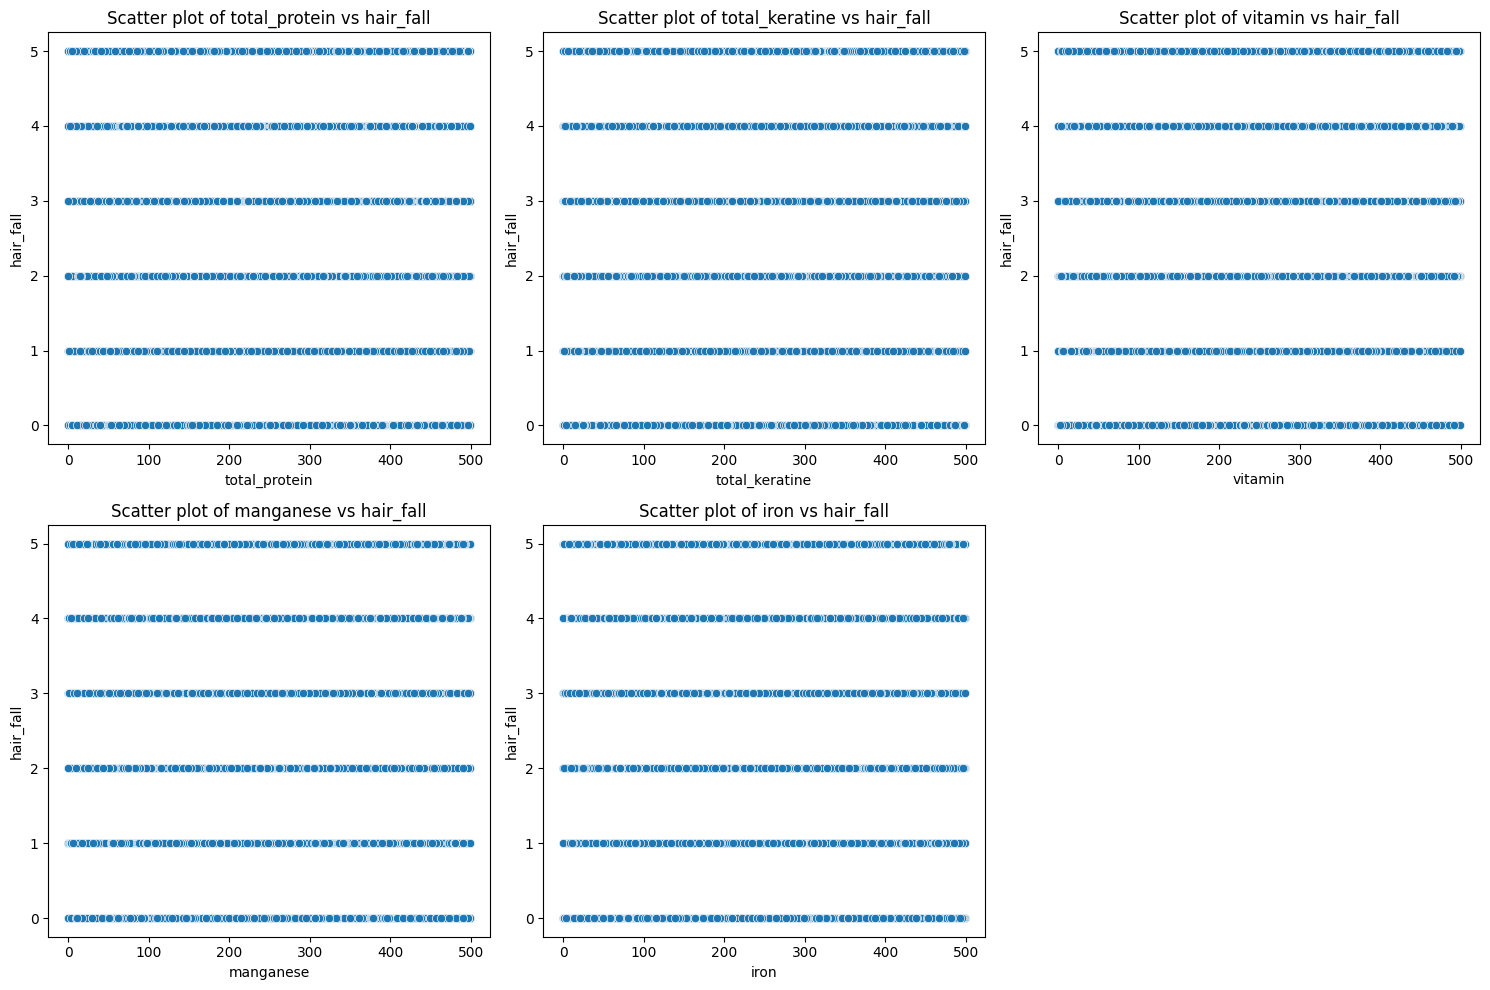

In [12]:
# Define pairs of variables to plot
pairs = [
    ('total_protein', 'hair_fall'),
    ('total_keratine', 'hair_fall'),
    ('vitamin', 'hair_fall'),
    ('manganese', 'hair_fall'),
    ('iron', 'hair_fall')
]

# Create scatter plots
plt.figure(figsize=(15, 10))
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'Scatter plot of {x} vs {y}')
plt.tight_layout()
plt.show()


In [13]:
# Display unique values and their frequencies in the 'hair_fall' column
hair_fall_counts = df['hair_fall'].value_counts()
print("Unique values and their frequencies in 'hair_fall':")
print(hair_fall_counts)


Unique values and their frequencies in 'hair_fall':
hair_fall
5    16853
2    16739
0    16692
1    16637
3    16544
4    16535
Name: count, dtype: int64


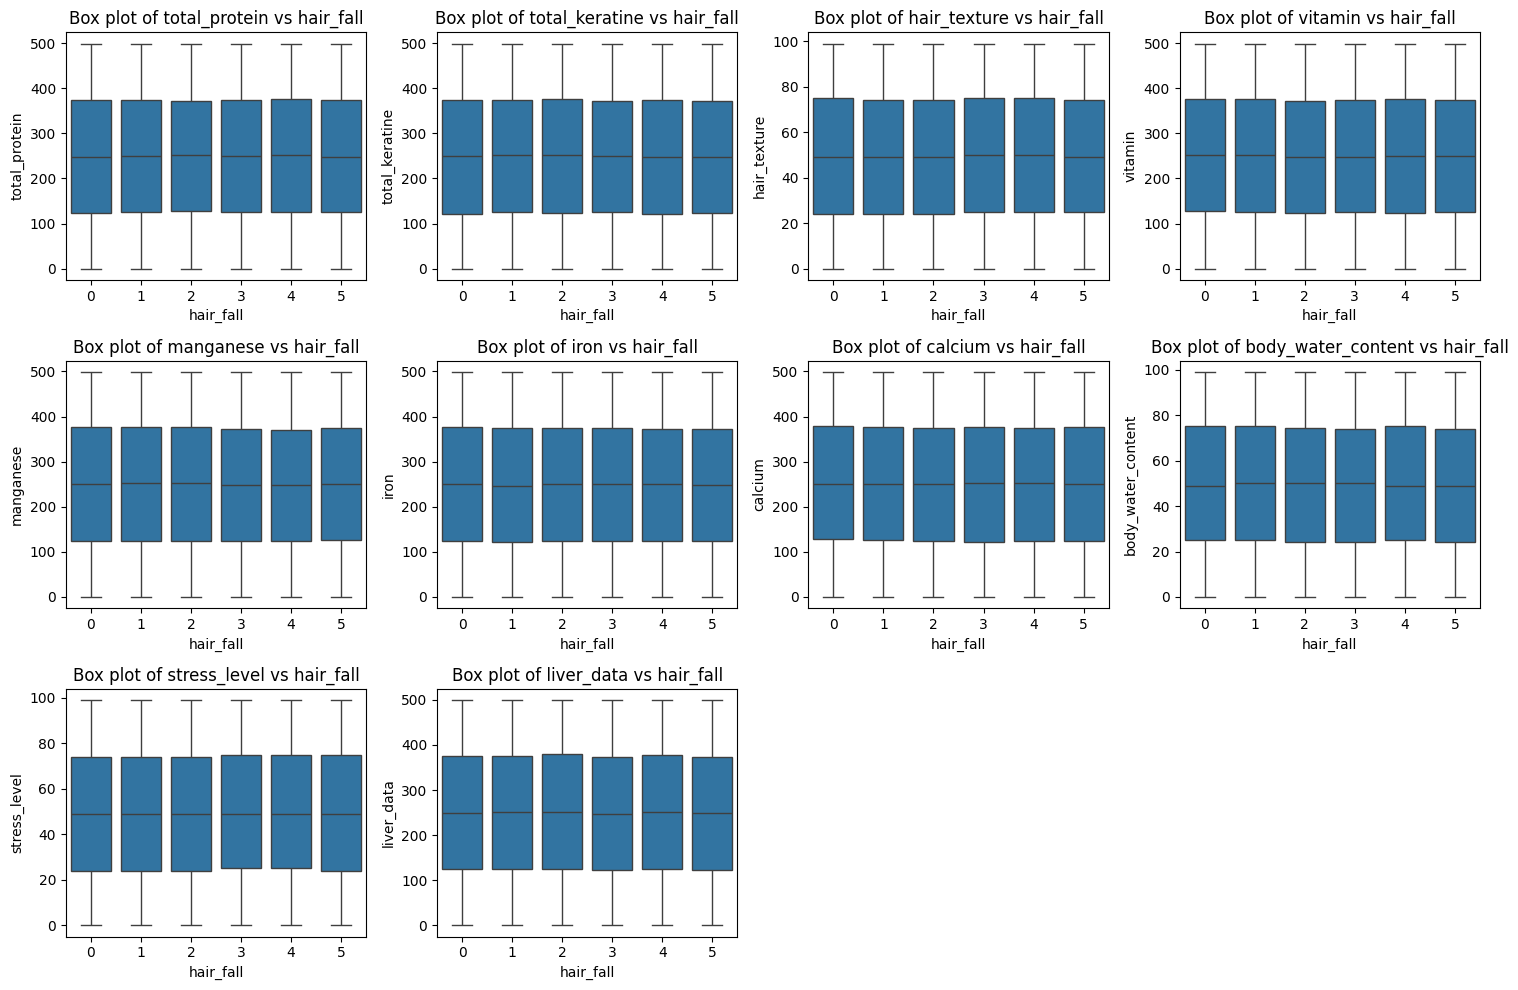

In [14]:
# Set the size of the plots
plt.figure(figsize=(15, 10))

# List of numerical columns to plot
numerical_columns = [
    'total_protein', 'total_keratine', 'hair_texture', 'vitamin',
    'manganese', 'iron', 'calcium', 'body_water_content', 'stress_level', 'liver_data'
]

# Create a box plot for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x='hair_fall', y=column)
    plt.title(f'Box plot of {column} vs hair_fall')

plt.tight_layout()
plt.show()


In [15]:
from scipy.stats import chi2_contingency

# List of categorical columns to analyze
categorical_columns = ['hair_texture', 'stress_level', 'liver_data']

# Iterate over each categorical column
for column in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df['hair_fall'], df[column])
    print(f"Contingency Table between 'hair_fall' and '{column}':")
    print(contingency_table)
    print()
    
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between 'hair_fall' and '{column}':")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-Value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies Table:")
    print(pd.DataFrame(expected, columns=contingency_table.columns, index=contingency_table.index))
    print("\n" + "-"*50 + "\n")


Contingency Table between 'hair_fall' and 'hair_texture':
hair_texture   0    1    2    3    4    5    6    7    8    9   ...   90   91  \
hair_fall                                                       ...             
0             183  171  172  177  169  168  184  160  172  162  ...  170  182   
1             155  193  159  151  190  146  180  159  173  199  ...  179  162   
2             177  165  157  185  172  176  175  185  153  158  ...  165  141   
3             194  175  167  152  161  160  151  166  148  176  ...  172  167   
4             171  165  149  159  153  165  173  159  160  164  ...  163  169   
5             162  193  164  153  184  163  160  153  177  170  ...  148  159   

hair_texture   92   93   94   95   96   97   98   99  
hair_fall                                             
0             159  163  180  149  163  167  189  164  
1             178  165  185  188  156  171  166  163  
2             167  141  169  174  155  136  183  192  
3             164 

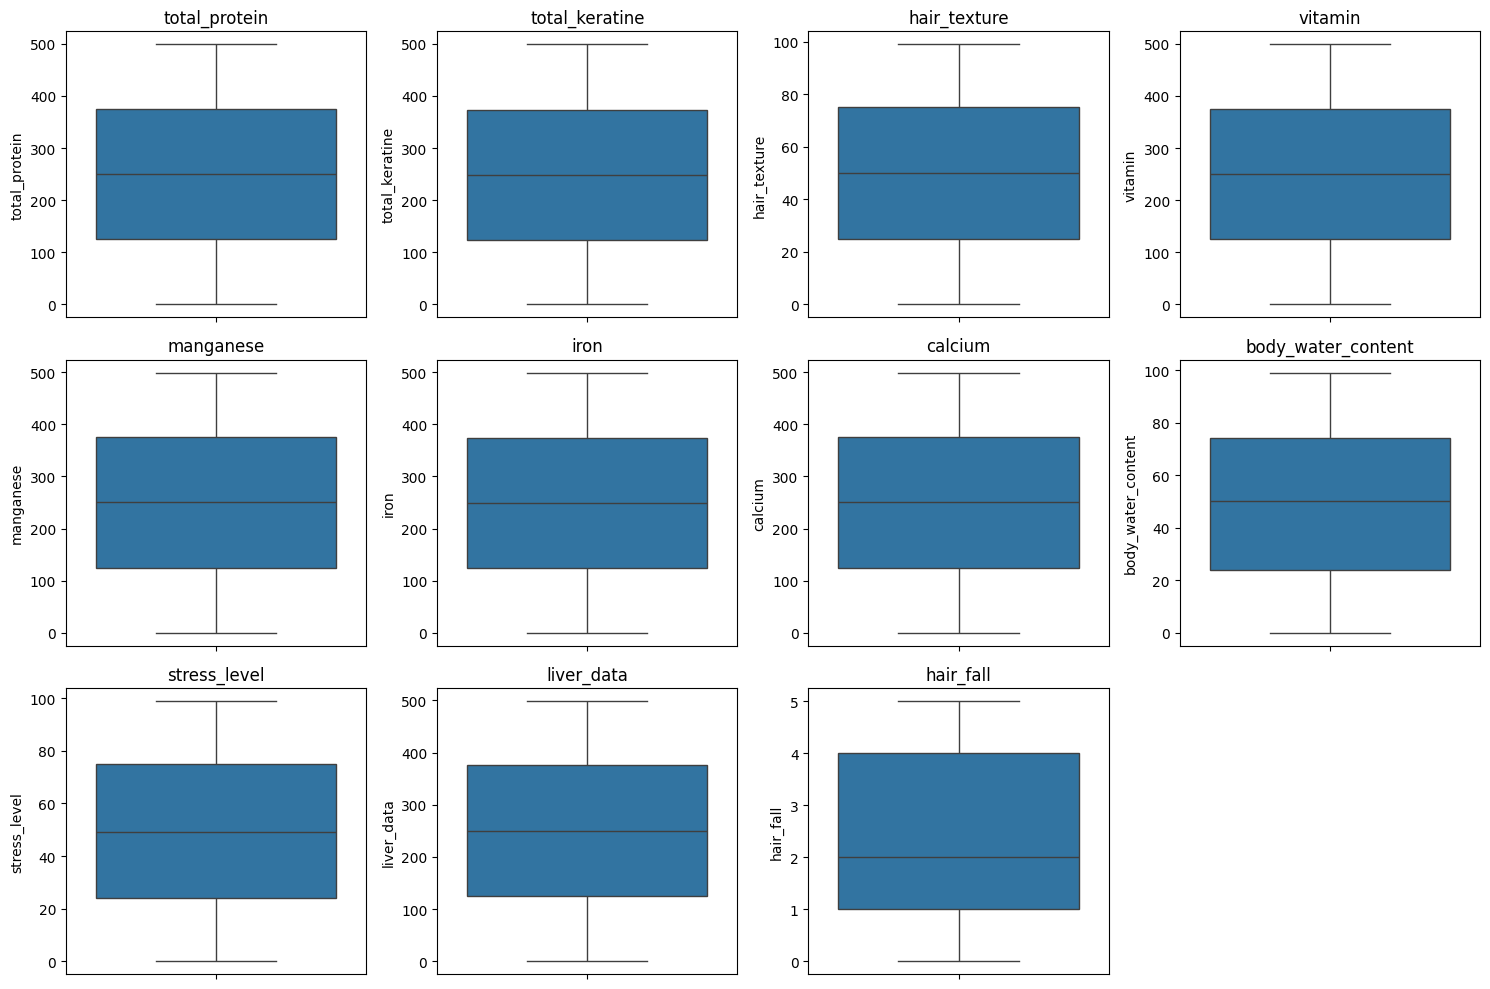

In [16]:
# Boxplot for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

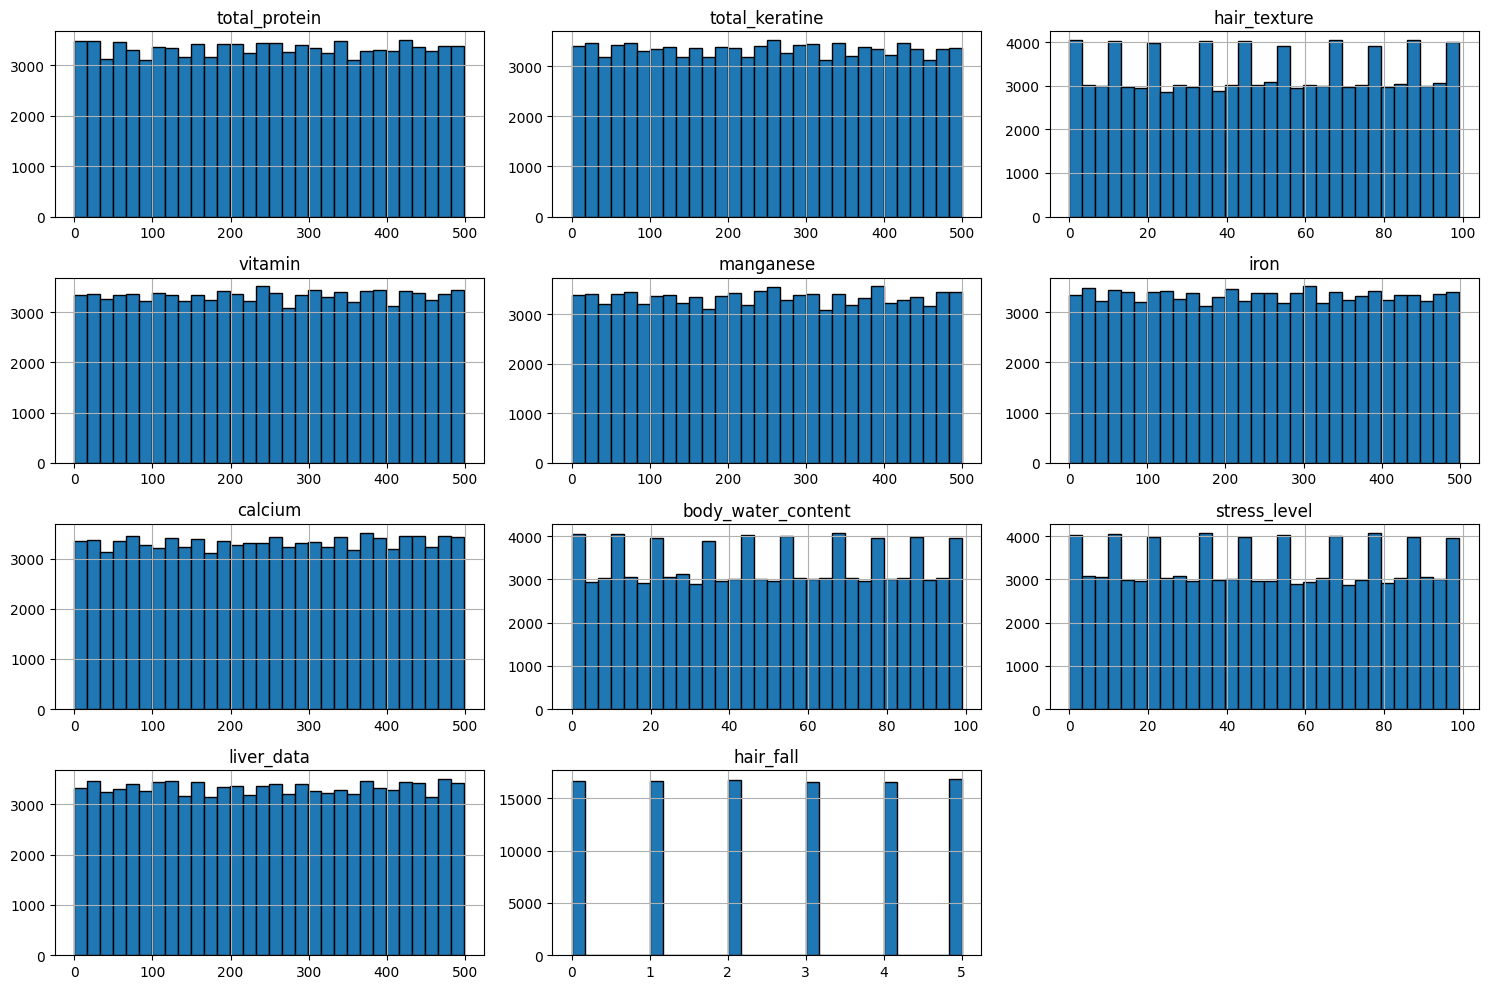

In [17]:
# Histograms for each numerical column
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

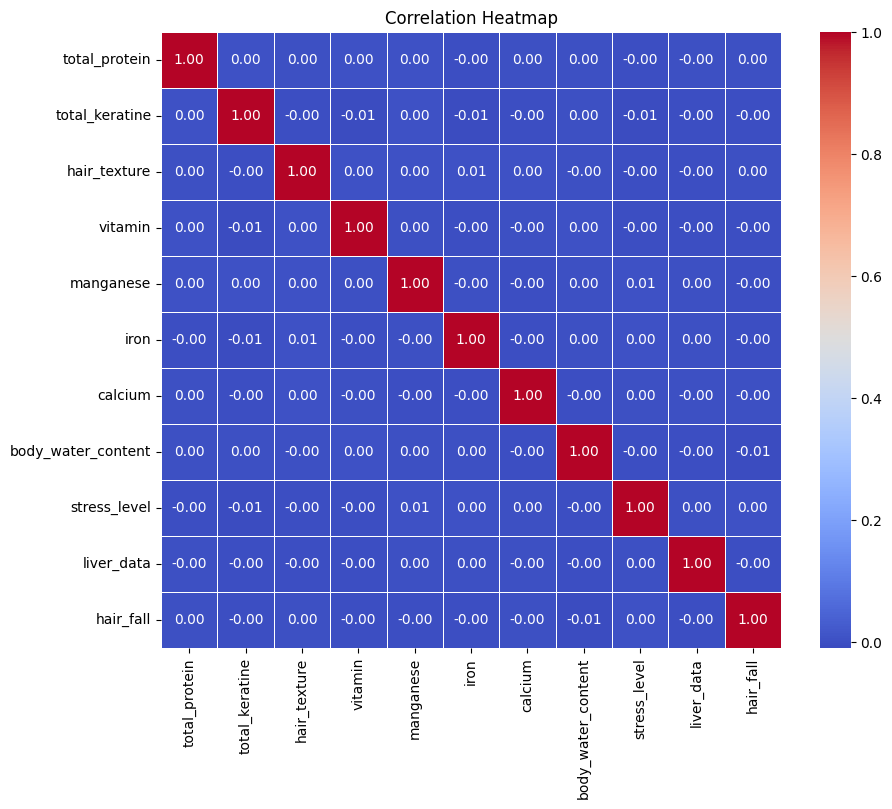

In [18]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

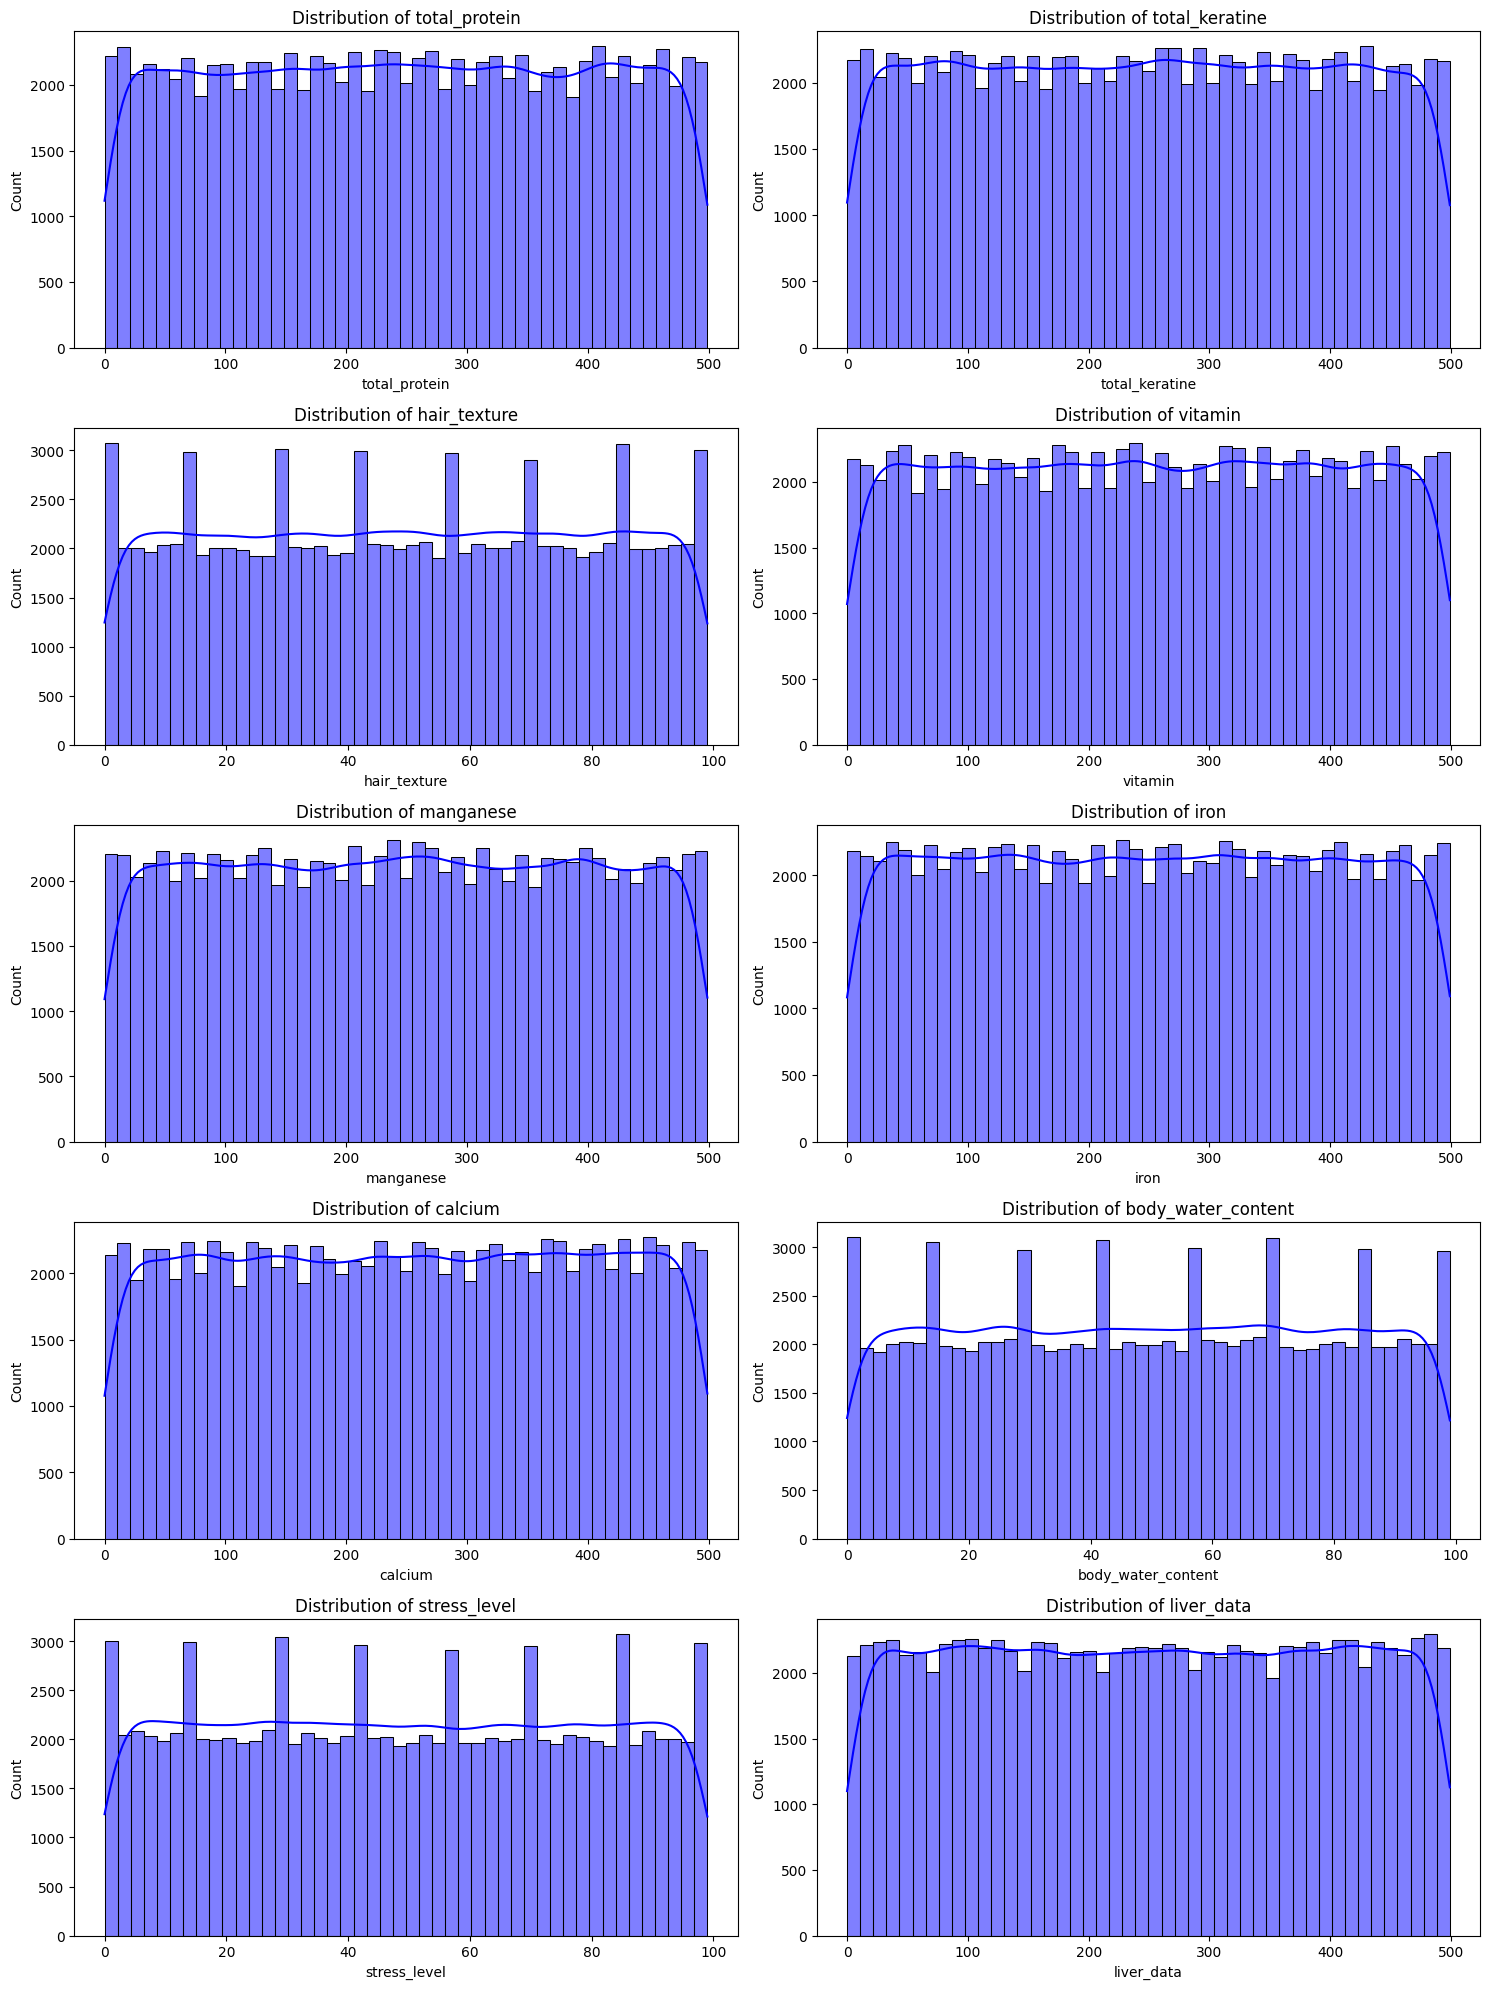

In [19]:
# Histograms for numerical variables
plt.figure(figsize=(15, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

C:\Users\reone\AppData\Local\Temp\ipykernel_25788\1504350529.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')


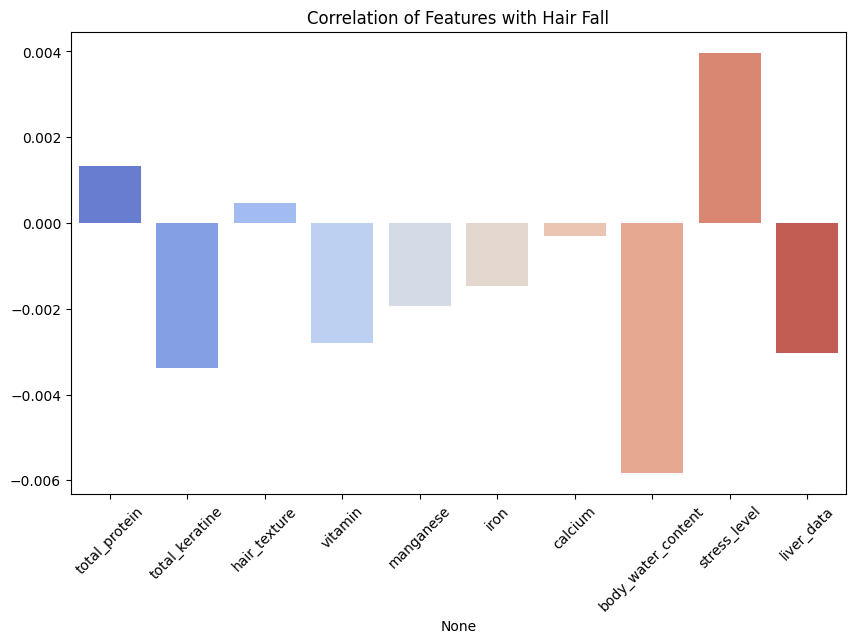

In [20]:
# Correlation of features with hair_fall
correlation_with_target = df.corr()['hair_fall'].drop('hair_fall')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title("Correlation of Features with Hair Fall")
plt.xticks(rotation=45)
plt.show()

# Data preprocessing and Feature Engineering (20%)

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
print("Data Types:\n", df.dtypes)

Data Types:
 total_protein         int64
total_keratine        int64
hair_texture          int64
vitamin               int64
manganese             int64
iron                  int64
calcium               int64
body_water_content    int64
stress_level          int64
liver_data            int64
hair_fall             int64
dtype: object


In [22]:
corr_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", corr_matrix)


Correlation Matrix:
                     total_protein  total_keratine  hair_texture   vitamin  \
total_protein            1.000000        0.003125      0.001476  0.002986   
total_keratine           0.003125        1.000000     -0.004992 -0.009062   
hair_texture             0.001476       -0.004992      1.000000  0.003983   
vitamin                  0.002986       -0.009062      0.003983  1.000000   
manganese                0.004049        0.003274      0.003974  0.000153   
iron                    -0.001733       -0.007433      0.006231 -0.002434   
calcium                  0.001075       -0.003344      0.004535 -0.000687   
body_water_content       0.001715        0.000361     -0.000281  0.003608   
stress_level            -0.004181       -0.006286     -0.002273 -0.002619   
liver_data              -0.000333       -0.001403     -0.001279 -0.001782   
hair_fall                0.001335       -0.003384      0.000468 -0.002807   

                    manganese      iron   calcium  bo

In [23]:
print(df['hair_texture'].nunique())
print(df['hair_texture'].unique()[:20])  

100
[14  3 11 19 58 76 33 64 32 15 81 31 25 28 89 71 74 86  8 24]


In [24]:
print(df['hair_texture'].value_counts().sort_index())

hair_texture
0     1042
1     1062
2      968
3      977
4     1029
      ... 
95    1029
96    1018
97     954
98    1048
99     998
Name: count, Length: 100, dtype: int64


In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['hair_texture_encoded'] = label_encoder.fit_transform(df['hair_texture'])

# Check the first few rows to ensure it's correctly encoded
print(df[['hair_texture', 'hair_texture_encoded']].head())
 

   hair_texture  hair_texture_encoded
0            14                    14
1             3                     3
2            11                    11
3            19                    19
4            58                    58


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Prepare features (X) and target (y)
X = df.drop(columns=['hair_fall'])
y = df['hair_fall']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Get feature importances and apply SelectFromModel
selector = SelectFromModel(rf_model, threshold='mean', max_features=10)  
X_train_selected = selector.transform(X_train)

# Output the selected features and their importance
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Output the shape of the data before and after selection
print("Shape before feature selection:", X_train.shape)
print("Shape after feature selection:", X_train_selected.shape)


C:\Users\reone\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected Features: Index(['total_protein', 'total_keratine', 'vitamin', 'manganese', 'iron',
       'calcium', 'liver_data'],
      dtype='object')
Shape before feature selection: (80000, 11)
Shape after feature selection: (80000, 7)


In [27]:
# Create 'stress_impact' feature by combining stress level and body water content
df['stress_impact'] = df['stress_level'] * df['body_water_content']

# Check the new feature
print(df[['stress_level', 'body_water_content', 'stress_impact']].head())


   stress_level  body_water_content  stress_impact
0            41                  44           1804
1            65                  26           1690
2            54                  30           1620
3            45                  48           2160
4            90                  23           2070


In [28]:
# 'stress_impact' to the list of features
selected_features_updated = selected_features.tolist() + ['stress_impact']

# Prepare features (X) and target (y) again
X_selected_updated = df[selected_features_updated]
X_train, X_test, y_train, y_test = train_test_split(X_selected_updated, y, test_size=0.2, random_state=42)

# Train a Random Forest model with updated features
rf_model_updated = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_updated.fit(X_train, y_train)

# Predictions
y_pred_updated = rf_model_updated.predict(X_test)

# Evaluate the updated model
from sklearn.metrics import classification_report, confusion_matrix
print("Updated Classification Report:")
print(classification_report(y_test, y_pred_updated))

print("Updated Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_updated))


Updated Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.18      0.17      3348
           1       0.17      0.18      0.17      3317
           2       0.16      0.17      0.16      3296
           3       0.18      0.17      0.17      3328
           4       0.17      0.16      0.16      3345
           5       0.16      0.16      0.16      3366

    accuracy                           0.17     20000
   macro avg       0.17      0.17      0.17     20000
weighted avg       0.17      0.17      0.17     20000

Updated Confusion Matrix:
[[610 601 601 501 492 543]
 [598 593 601 481 483 561]
 [569 612 548 507 494 566]
 [613 591 542 553 488 541]
 [601 531 587 527 520 579]
 [647 595 562 540 498 524]]


In [29]:
print(df['hair_fall'].value_counts())

hair_fall
5    16853
2    16739
0    16692
1    16637
3    16544
4    16535
Name: count, dtype: int64


# Model Development and Evaluation (30%)

### Data splitting

In [30]:
# selected features
X = df[['total_protein', 'total_keratine', 'vitamin', 'manganese', 'iron', 'calcium', 'liver_data']]  
y = df['hair_fall']  

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training Set: {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Test Set: {X_test.shape[0]} samples")


Training Set: 70000 samples
Validation Set: 15000 samples
Test Set: 15000 samples


In [31]:
!pip install xgboost

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report, confusion_matrix

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models (Fixed issues)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Ridge Classifier": RidgeClassifier(),
    "SGD Classifier": SGDClassifier(loss="hinge", max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(),
    "KMeans": KMeans(n_clusters=6, random_state=42),
    "MiniBatch KMeans": MiniBatchKMeans(n_clusters=6, random_state=42),
    "DBSCAN": DBSCAN(),
    "Gaussian Mixture": GaussianMixture(n_components=6, random_state=42)
}

# Loop through each model for training and evaluation using StratifiedKFold
for name, model in models.items():
    print(f"--- {name} ---")
    
    fold_results = []  # List to store results for each fold
    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model
        model.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation set
        if name not in ['KMeans', 'MiniBatch KMeans', 'DBSCAN', 'Gaussian Mixture']:
            # For classification models
            y_pred = model.predict(X_val_fold)
        else:
            # For clustering models (unsupervised learning)
            y_pred = model.fit_predict(X_val_fold)

        # Collect the fold's performance metrics
        fold_results.append({
            "classification_report": classification_report(y_val_fold, y_pred, output_dict=True),
            "confusion_matrix": confusion_matrix(y_val_fold, y_pred)
        })

    # Calculate average performance across all folds for classification report
    avg_classification_report = {metric: np.mean([
        np.mean([fold['classification_report'][str(i)][metric] for i in range(6)])  # 6 classes
        for fold in fold_results
    ]) for metric in ['precision', 'recall', 'f1-score']}
    
    # Calculate the average confusion matrix
    avg_confusion_matrix = np.mean([fold['confusion_matrix'] for fold in fold_results], axis=0)

    # Print results
    print("Average Classification Report:")
    print(avg_classification_report)
    print("Average Confusion Matrix:")
    print(avg_confusion_matrix)
    print("\n")


--- Logistic Regression ---
Average Classification Report:
{'precision': np.float64(0.16205788683355066), 'recall': np.float64(0.16447604622666628), 'f1-score': np.float64(0.13840086071262409)}
Average Confusion Matrix:
[[196.2 170.8 707.  198.8 167.  891.4]
 [194.6 160.6 712.  192.4 170.  893. ]
 [206.  171.2 718.  188.8 175.2 903.4]
 [203.  162.  696.2 191.  172.8 885.2]
 [190.4 159.4 718.8 190.  156.2 889.8]
 [214.2 173.  709.6 194.8 179.  898.2]]


--- Ridge Classifier ---
Average Classification Report:
{'precision': np.float64(0.16260023108023589), 'recall': np.float64(0.16456015322785228), 'f1-score': np.float64(0.13792600512533554)}
Average Confusion Matrix:
[[194.4 168.4 708.8 195.4 163.4 900.8]
 [193.2 158.  716.6 189.6 164.6 900.6]
 [204.2 169.4 722.4 185.2 171.4 910. ]
 [201.8 159.4 701.8 187.2 170.  890. ]
 [189.2 156.2 720.8 185.8 154.8 897.8]
 [212.6 170.2 714.4 192.  174.8 904.8]]


--- SGD Classifier ---


C:\Users\reone\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\reone\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\reone\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Average Classification Report:
{'precision': np.float64(0.12785852936642467), 'recall': np.float64(0.16528715323188709), 'f1-score': np.float64(0.10630272802879759)}
Average Confusion Matrix:
[[587.   53.8 437.4 132.6 553.8 566.6]
 [594.2  50.4 430.4 139.2 530.4 578. ]
 [609.8  56.4 444.  144.  549.6 558.8]
 [594.   57.6 434.6 136.  545.2 542.8]
 [601.2  52.4 435.2 132.2 541.4 542.2]
 [610.8  50.6 443.8 148.4 555.  560.2]]


--- Random Forest ---
Average Classification Report:
{'precision': np.float64(0.16427511807843262), 'recall': np.float64(0.1643364846269428), 'f1-score': np.float64(0.16411887140457468)}
Average Confusion Matrix:
[[435.6 404.6 411.8 364.6 339.2 375.4]
 [415.2 380.6 421.6 372.6 351.2 381.4]
 [441.2 404.2 407.8 370.  356.6 382.8]
 [421.4 386.6 412.  375.  343.4 371.8]
 [414.4 406.2 409.8 358.6 333.8 381.8]
 [423.4 430.4 414.8 376.6 355.2 368.4]]


--- Decision Tree ---
Average Classification Report:
{'precision': np.float64(0.16485551093047748), 'recall': np.float64(

C:\Users\reone\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\reone\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\reone\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Average Classification Report:
{'precision': np.float64(0.1476958324853558), 'recall': np.float64(0.16587070659618078), 'f1-score': np.float64(0.11994679970109061)}
Average Confusion Matrix:
[[298.6 101.8 947.4  52.8 140.6 790. ]
 [296.8 103.6 957.8  46.  131.8 786.6]
 [304.8 110.2 958.8  52.  140.6 796.2]
 [301.8 108.2 926.6  49.  133.2 791.4]
 [298.8  94.2 924.8  49.2 127.2 810.4]
 [304.8 108.6 959.2  52.4 137.8 806. ]]


--- KMeans ---
Average Classification Report:
{'precision': np.float64(0.1679013514427771), 'recall': np.float64(0.1679401092338272), 'f1-score': np.float64(0.16786328735896708)}
Average Confusion Matrix:
[[402.2 389.2 388.4 377.6 388.2 385.6]
 [387.8 391.2 400.8 375.8 385.8 381.2]
 [403.8 388.8 400.6 385.  405.  379.4]
 [397.2 382.6 396.2 371.2 396.2 366.8]
 [378.6 382.4 379.2 380.2 393.8 390.4]
 [395.2 386.8 399.8 393.2 401.6 392.2]]


--- MiniBatch KMeans ---
Average Classification Report:
{'precision': np.float64(0.16807644052818865), 'recall': np.float64(0.1680

C:\Users\reone\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\reone\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\reone\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Average Classification Report:
{'precision': np.float64(0.0), 'recall': np.float64(0.0), 'f1-score': np.float64(0.0)}
Average Confusion Matrix:
[[   0.     0.     0.     0.     0.     0.     0. ]
 [2331.2    0.     0.     0.     0.     0.     0. ]
 [2322.6    0.     0.     0.     0.     0.     0. ]
 [2362.6    0.     0.     0.     0.     0.     0. ]
 [2310.2    0.     0.     0.     0.     0.     0. ]
 [2304.6    0.     0.     0.     0.     0.     0. ]
 [2368.8    0.     0.     0.     0.     0.     0. ]]


--- Gaussian Mixture ---
Average Classification Report:
{'precision': np.float64(0.16803948447509098), 'recall': np.float64(0.16783351246445843), 'f1-score': np.float64(0.16712565426325643)}
Average Confusion Matrix:
[[393.8 384.8 440.  367.2 380.  365.4]
 [379.  383.4 435.  372.6 380.8 371.8]
 [373.2 383.8 455.6 369.6 401.6 378.8]
 [391.8 380.4 433.6 354.8 392.  357.6]
 [362.2 383.2 426.8 370.2 380.6 381.6]
 [373.8 378.8 458.2 379.  396.6 382.4]]




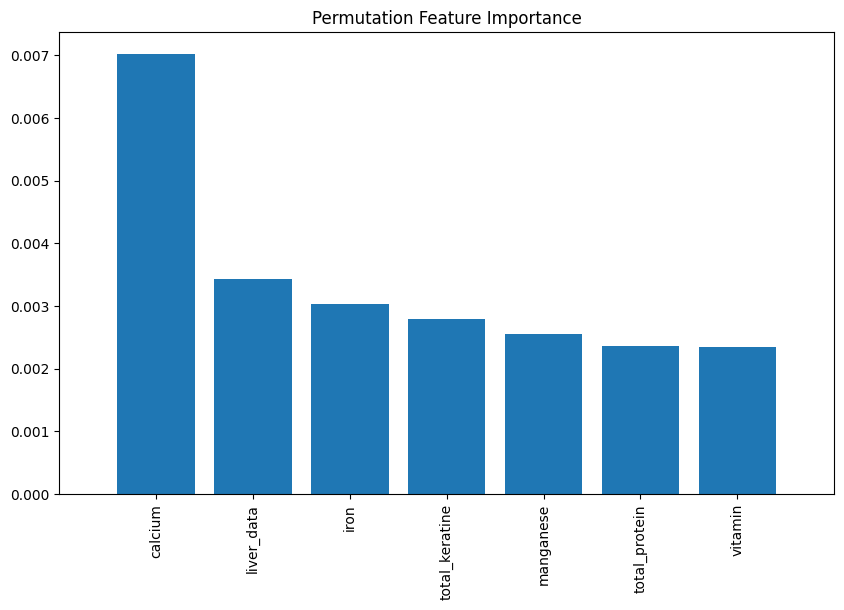

In [32]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
# Compute permutation importance
result = permutation_importance(models['XGBoost'], X_test, y_test, n_repeats=10, random_state=42)

# Get the importance scores
importance_scores = result.importances_mean

# Sort the importance scores in descending order
indices = np.argsort(importance_scores)[::-1]

# Plot the permutation importance
plt.figure(figsize=(10, 6))
plt.title("Permutation Feature Importance")
plt.bar(range(X_test.shape[1]), importance_scores[indices], align="center")
plt.xticks(range(X_test.shape[1]), X_test.columns[indices], rotation=90)
plt.xlim([-1, X_test.shape[1]])
plt.show()


In [33]:
# import shap

# # Select the best-performing model
# best_model = models["XGBoost"] 
 
# # Initialize the SHAP explainer
# explainer = shap.Explainer(best_model, X_train)

# # Calculate SHAP values
# shap_values = explainer(X_train)

# # Visualize the SHAP values
# shap.summary_plot(shap_values, X_train)


In [37]:
import lime
import lime.lime_tabular
import numpy as np

best_model = models["XGBoost"] 
# Ensure X_train is a NumPy array for LIME
X_train_np = np.array(X_train)

# Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=X_train.columns.tolist(),
    class_names=['No Hair Fall', 'Hair Fall'],  # Adjust based on your target variable
    mode='classification'
)

# Pick a random instance to explain
i = np.random.randint(0, X_train_np.shape[0])
exp = explainer.explain_instance(X_train_np[i], best_model.predict_proba, num_features=10)

# Visualize the explanation
exp.show_in_notebook()


In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

# Selected features
X = df[['total_protein', 'total_keratine', 'vitamin', 'manganese', 'iron', 'calcium', 'liver_data']]
y = df['hair_fall']

# Splitting data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost
xgb_model = XGBClassifier(random_state=42)

# Cross-validation for XGBoost
fold_results = []
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    xgb_model.fit(X_train_fold, y_train_fold)
    y_pred = xgb_model.predict(X_val_fold)
    
    fold_results.append({
        "classification_report": classification_report(y_val_fold, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_val_fold, y_pred),
        "accuracy": accuracy_score(y_val_fold, y_pred)
    })

# Calculate average classification metrics
avg_classification_report = {
    metric: np.mean([
        np.mean([fold['classification_report'][str(i)][metric] for i in range(6)])  # 6 classes
        for fold in fold_results
    ]) for metric in ['precision', 'recall', 'f1-score']
}

avg_confusion_matrix = np.mean([fold['confusion_matrix'] for fold in fold_results], axis=0)

# Print results
print("Average Validation Classification Report:")
print(avg_classification_report)
print("Average Validation Confusion Matrix:")
print(avg_confusion_matrix)

Average Validation Classification Report:
{'precision': np.float64(0.16725959048406414), 'recall': np.float64(0.16726335371900533), 'f1-score': np.float64(0.16713873249842076)}
Average Validation Confusion Matrix:
[[372.2 395.6 425.  382.  350.6 405.8]
 [364.8 399.2 413.  377.6 354.  414. ]
 [400.8 398.8 422.  378.8 348.4 413.8]
 [392.  378.4 404.4 384.2 348.6 402.6]
 [361.4 396.  403.2 368.8 347.4 427.8]
 [390.8 401.8 417.6 385.8 355.  417.8]]
